In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import json

In [2]:
# Load the parquet file into a pandas DataFrame
df = pd.read_parquet('dataforanalysing.parquet')

In [3]:
# Load the original taxi parquet file into a pandas DataFrame
df1 = pd.read_parquet('combined.parquet')

In [4]:
df.shape

(32781256, 18)

In [5]:
# Load the data
zones = pd.read_csv('taxi_zones.csv')

In [6]:
zones.shape

(263, 7)

In [7]:
# #Got duplicate rows
# duplicate_rows = df[df.duplicated(keep=False)]

# # Count number of total rows
# total_rows = len(df)

# # Count the number of duplicate rows
# duplicate_number = len(duplicate_rows)

# # Calculate the percentage of duplicate rows
# duplicate_percentage = (duplicate_number / total_rows) * 100
# duplicate_percentage

In [8]:
# duplicate_rows

In [9]:
# # Drop duplicate rows with all feature values being the same
# df = df.drop_duplicates()

In [10]:
# # Count the percentage of NaN values
# nan_percentage = (df.isna().sum().sum() / df.size) * 100
# nan_percentage

In [11]:
nan_count = df.isna().sum().sum()
nan_count

0

In [12]:
# # Drop rows with missing values
# df.dropna(inplace=True)

In [13]:
# nan_count = df.isna().sum().sum()
# nan_count

In [14]:
# Filter for Manhattan
manhattan_zones = zones[zones['borough'] == 'Manhattan']

In [15]:
# Extract location IDs
# As we can see from the map, there is no parking site on location 103
manhattan_ids = manhattan_zones['LocationID'].tolist()
manhattan_ids = [x for x in manhattan_ids if x != 103]
manhattan_ids

[4,
 24,
 12,
 13,
 41,
 45,
 42,
 43,
 48,
 50,
 68,
 79,
 74,
 75,
 87,
 88,
 90,
 125,
 100,
 107,
 113,
 114,
 116,
 120,
 127,
 128,
 151,
 140,
 137,
 141,
 142,
 152,
 143,
 144,
 148,
 153,
 158,
 161,
 162,
 163,
 164,
 170,
 166,
 186,
 194,
 202,
 209,
 211,
 224,
 229,
 230,
 231,
 239,
 232,
 233,
 234,
 236,
 237,
 238,
 263,
 243,
 244,
 246,
 249,
 261,
 262]

In [16]:
unique_count = len(set(manhattan_ids))
unique_count

66

In [17]:
# Return the first 10 rows.
df.head(10)

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,PULocationID,DOLocationID,pickup_date,pickup_time,dropoff_date,dropoff_time,pickup_month,dropoff_month,holiday,week,day_type,dropoff_timeslots,pickup_timeslots,season,passenger
0,2022-01-01,2022-01-01 00:53:29,2.0,142,236,2022-01-01,00:00:00,2022-01-01,00:00:00,January,January,False,5,weekend,Late Night,Late Night,winter,small
1598725,2022-01-21,2022-01-21 23:40:21,1.0,209,40,2022-01-21,23:00:00,2022-01-21,23:00:00,January,January,False,4,workday,Late Night,Late Night,winter,small
1598724,2022-01-21,2022-01-21 23:53:46,2.0,79,229,2022-01-21,23:00:00,2022-01-21,23:00:00,January,January,False,4,workday,Late Night,Late Night,winter,small
1598723,2022-01-21,2022-01-21 23:39:36,1.0,164,79,2022-01-21,23:00:00,2022-01-21,23:00:00,January,January,False,4,workday,Late Night,Late Night,winter,small
1598722,2022-01-21,2022-01-21 23:28:44,1.0,48,137,2022-01-21,23:00:00,2022-01-21,23:00:00,January,January,False,4,workday,Late Night,Late Night,winter,small
1598721,2022-01-21,2022-01-21 23:55:42,2.0,132,143,2022-01-21,23:00:00,2022-01-21,23:00:00,January,January,False,4,workday,Late Night,Late Night,winter,small
1598720,2022-01-21,2022-01-21 23:41:16,1.0,114,239,2022-01-21,23:00:00,2022-01-21,23:00:00,January,January,False,4,workday,Late Night,Late Night,winter,small
1598719,2022-01-21,2022-01-22 00:11:26,1.0,236,243,2022-01-21,23:00:00,2022-01-22,00:00:00,January,January,False,4,workday,Late Night,Late Night,winter,small
1598718,2022-01-21,2022-01-21 23:57:03,1.0,263,236,2022-01-21,23:00:00,2022-01-21,23:00:00,January,January,False,4,workday,Late Night,Late Night,winter,small
1598716,2022-01-21,2022-01-21 23:53:06,1.0,114,236,2022-01-21,23:00:00,2022-01-21,23:00:00,January,January,False,4,workday,Late Night,Late Night,winter,small


In [18]:
# Return the first 10 rows for original dataframe.
df1.head(10)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.80,1.0,N,142,236,1,14.5,3.0,0.5,3.65,0.00,0.3,21.95,2.5,0.0
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.10,1.0,N,236,42,1,8.0,0.5,0.5,4.00,0.00,0.3,13.30,0.0,0.0
2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,0.97,1.0,N,166,166,1,7.5,0.5,0.5,1.76,0.00,0.3,10.56,0.0,0.0
3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.0,1.09,1.0,N,114,68,2,8.0,0.5,0.5,0.00,0.00,0.3,11.80,2.5,0.0
4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.0,4.30,1.0,N,68,163,1,23.5,0.5,0.5,3.00,0.00,0.3,30.30,2.5,0.0
5,1,2022-01-01 00:40:15,2022-01-01 01:09:48,1.0,10.30,1.0,N,138,161,1,33.0,3.0,0.5,13.00,6.55,0.3,56.35,2.5,0.0
6,2,2022-01-01 00:20:50,2022-01-01 00:34:58,1.0,5.07,1.0,N,233,87,1,17.0,0.5,0.5,5.20,0.00,0.3,26.00,2.5,0.0
7,2,2022-01-01 00:13:04,2022-01-01 00:22:45,1.0,2.02,1.0,N,238,152,2,9.0,0.5,0.5,0.00,0.00,0.3,12.80,2.5,0.0
8,2,2022-01-01 00:30:02,2022-01-01 00:44:49,1.0,2.71,1.0,N,166,236,1,12.0,0.5,0.5,2.25,0.00,0.3,18.05,2.5,0.0
9,2,2022-01-01 00:48:52,2022-01-01 00:53:28,1.0,0.78,1.0,N,236,141,2,5.0,0.5,0.5,0.00,0.00,0.3,8.80,2.5,0.0


In [19]:
df.shape

(32781256, 18)

In [20]:
# Filter the dataframe to drop rows where neither PULocationID nor DOLocationID is in the Manhattan ID list
filtered_df = df[(df['PULocationID'].isin(manhattan_ids)) | (df['DOLocationID'].isin(manhattan_ids))]

In [21]:
filtered_df.shape

(32781256, 18)

In [22]:
distinct_PULocationID = filtered_df['PULocationID'].nunique()
distinct_PULocationID

261

In [23]:
# # Convert pickup datetime column from object to datetime type
# df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
# # Convert dropoff datetime column from object to datetime type
# df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

In [24]:
# Filter the dataframe to drop rows where neither PULocationID nor DOLocationID is in the Manhattan ID list
test_df = df[(df['PULocationID'].isin(manhattan_ids)) & (df['DOLocationID'].isin(manhattan_ids))]

## Select features for busyness claculation for pickup_count

In [25]:
pickup_activity = filtered_df[['PULocationID', 'pickup_time', 'holiday']]
pickup_activity

,PULocationID,pickup_time,holiday
0,142,00:00:00,False
1598725,209,23:00:00,False
1598724,79,23:00:00,False
1598723,164,23:00:00,False
1598722,48,23:00:00,False
...,...,...,...
34042515,140,19:00:00,False
34042516,142,19:00:00,False
34042512,87,19:00:00,False
34042517,163,19:00:00,False


In [26]:
# Order the rows of the pickup_activity DataFrame by 'PULocationID' and then 'pickup_time'
pickup_activity = pickup_activity.sort_values(by=['PULocationID', 'pickup_time'])
pickup_activity

,PULocationID,pickup_time,holiday
4919329,1,05:00:00,False
6583895,1,05:00:00,False
22606143,1,06:00:00,False
27504467,1,06:00:00,False
10843891,1,07:00:00,False
...,...,...,...
28739601,265,23:00:00,False
26244805,265,23:00:00,False
31592443,265,23:00:00,False
32418304,265,23:00:00,False


## When holiday=False

In [27]:
pickup_activity_noHoliday = pickup_activity[pickup_activity['holiday'] == False]
pickup_activity_noHoliday = pickup_activity_noHoliday.groupby(['PULocationID', 'pickup_time', 'holiday'], as_index=False).size()
pickup_activity_noHoliday = pickup_activity_noHoliday.rename(columns={'size': 'pickup_count'})
pickup_activity_noHoliday

,PULocationID,pickup_time,holiday,pickup_count
0,1,05:00:00,False,2
1,1,06:00:00,False,2
2,1,07:00:00,False,4
3,1,08:00:00,False,3
4,1,09:00:00,False,7
...,...,...,...,...
5051,265,19:00:00,False,26
5052,265,20:00:00,False,35
5053,265,21:00:00,False,21
5054,265,22:00:00,False,29


In [28]:
# Order the rows of the pickup_activity DataFrame by 'PULocationID' and then 'pickup_time'
pickup_activity_noHoliday = pickup_activity_noHoliday.sort_values(by=['PULocationID', 'pickup_time'])
pickup_activity_noHoliday

,PULocationID,pickup_time,holiday,pickup_count
0,1,05:00:00,False,2
1,1,06:00:00,False,2
2,1,07:00:00,False,4
3,1,08:00:00,False,3
4,1,09:00:00,False,7
...,...,...,...,...
5051,265,19:00:00,False,26
5052,265,20:00:00,False,35
5053,265,21:00:00,False,21
5054,265,22:00:00,False,29


## When holiday=True

In [29]:
pickup_activity_Holiday = pickup_activity[pickup_activity['holiday'] == True]
pickup_activity_Holiday = pickup_activity_Holiday.groupby(['PULocationID', 'pickup_time', 'holiday'], as_index=False).size()
pickup_activity_Holiday = pickup_activity_Holiday.rename(columns={'size': 'pickup_count'})
pickup_activity_Holiday

,PULocationID,pickup_time,holiday,pickup_count
0,1,19:00:00,True,2
1,1,20:00:00,True,1
2,3,14:00:00,True,1
3,3,19:00:00,True,1
4,4,00:00:00,True,49
...,...,...,...,...
2653,265,14:00:00,True,1
2654,265,18:00:00,True,1
2655,265,19:00:00,True,2
2656,265,21:00:00,True,2


In [30]:
# Order the rows of the pickup_activity DataFrame by 'DOLocationID' and then 'pickup_time'
pickup_activity_Holiday = pickup_activity_Holiday.sort_values(by=['PULocationID', 'pickup_time'])
pickup_activity_Holiday

,PULocationID,pickup_time,holiday,pickup_count
0,1,19:00:00,True,2
1,1,20:00:00,True,1
2,3,14:00:00,True,1
3,3,19:00:00,True,1
4,4,00:00:00,True,49
...,...,...,...,...
2653,265,14:00:00,True,1
2654,265,18:00:00,True,1
2655,265,19:00:00,True,2
2656,265,21:00:00,True,2


## Select features for busyness claculation for dropoff_count

In [31]:
dropoff_activity = filtered_df[['DOLocationID', 'dropoff_time', 'holiday']]
dropoff_activity

,DOLocationID,dropoff_time,holiday
0,236,00:00:00,False
1598725,40,23:00:00,False
1598724,229,23:00:00,False
1598723,79,23:00:00,False
1598722,137,23:00:00,False
...,...,...,...
34042515,141,19:00:00,False
34042516,163,19:00:00,False
34042512,233,19:00:00,False
34042517,143,19:00:00,False


In [32]:
# Order the rows of the dropoff_activity DataFrame by 'DOLocationID' and then 'dropoff_time'
dropoff_activity = dropoff_activity.sort_values(by=['DOLocationID', 'dropoff_time'])
dropoff_activity

,DOLocationID,dropoff_time,holiday
2120799,1,00:00:00,False
2023374,1,00:00:00,False
68139,1,00:00:00,False
1183230,1,00:00:00,False
628249,1,00:00:00,False
...,...,...,...
34069844,265,23:00:00,False
34064373,265,23:00:00,False
34065475,265,23:00:00,False
34068271,265,23:00:00,False


## When holiday = False

In [33]:
dropoff_activity_noHoliday = dropoff_activity[dropoff_activity['holiday'] == False]
dropoff_activity_noHoliday = dropoff_activity_noHoliday.groupby(['DOLocationID', 'dropoff_time', 'holiday'], as_index=False).size()
dropoff_activity_noHoliday = dropoff_activity_noHoliday.rename(columns={'size': 'dropoff_count'})
dropoff_activity_noHoliday

,DOLocationID,dropoff_time,holiday,dropoff_count
0,1,00:00:00,False,66
1,1,01:00:00,False,49
2,1,02:00:00,False,95
3,1,03:00:00,False,407
4,1,04:00:00,False,1325
...,...,...,...,...
6151,265,19:00:00,False,1434
6152,265,20:00:00,False,1412
6153,265,21:00:00,False,1539
6154,265,22:00:00,False,1677


In [34]:
# Order the rows of the dropoff_activity DataFrame by 'DOLocationID' and then 'dropoff_time'
dropoff_activity_noHoliday = dropoff_activity_noHoliday.sort_values(by=['DOLocationID', 'dropoff_time'])
dropoff_activity_noHoliday

,DOLocationID,dropoff_time,holiday,dropoff_count
0,1,00:00:00,False,66
1,1,01:00:00,False,49
2,1,02:00:00,False,95
3,1,03:00:00,False,407
4,1,04:00:00,False,1325
...,...,...,...,...
6151,265,19:00:00,False,1434
6152,265,20:00:00,False,1412
6153,265,21:00:00,False,1539
6154,265,22:00:00,False,1677


## When holiday=True

In [35]:
dropoff_activity_Holiday = dropoff_activity[dropoff_activity['holiday'] == True]
dropoff_activity_Holiday = dropoff_activity_Holiday.groupby(['DOLocationID', 'dropoff_time', 'holiday'], as_index=False).size()
dropoff_activity_Holiday = dropoff_activity_Holiday.rename(columns={'size': 'dropoff_count'})
dropoff_activity_Holiday

,DOLocationID,dropoff_time,holiday,dropoff_count
0,1,00:00:00,True,2
1,1,01:00:00,True,3
2,1,02:00:00,True,4
3,1,03:00:00,True,13
4,1,04:00:00,True,51
...,...,...,...,...
4536,265,19:00:00,True,31
4537,265,20:00:00,True,20
4538,265,21:00:00,True,22
4539,265,22:00:00,True,24


In [36]:
# Order the rows of the dropoff_activity DataFrame by 'DOLocationID' and then 'dropoff_time'
dropoff_activity_Holiday = dropoff_activity_Holiday.sort_values(by=['DOLocationID', 'dropoff_time'])
dropoff_activity_Holiday

,DOLocationID,dropoff_time,holiday,dropoff_count
0,1,00:00:00,True,2
1,1,01:00:00,True,3
2,1,02:00:00,True,4
3,1,03:00:00,True,13
4,1,04:00:00,True,51
...,...,...,...,...
4536,265,19:00:00,True,31
4537,265,20:00:00,True,20
4538,265,21:00:00,True,22
4539,265,22:00:00,True,24


## busyness calculation when no holiday

In [37]:
# Rename the columns of the pickup_activity_noHoliday and dropoff_activity_noHoliday DataFrame
pickup_activity_noHoliday.rename(columns={'pickup_time': 'time', 'PULocationID': 'LocationID'}, inplace=True)
dropoff_activity_noHoliday.rename(columns={'dropoff_time': 'time', 'DOLocationID': 'LocationID'}, inplace=True)

In [38]:
# Create two new DataFrames, one for rows with 'LocationID' in the 'manhattan_ids' list 
# and one for rows with 'LocationID' not in the 'manhattan_ids' list
pickup_activity_noHoliday_in_manhattan = pickup_activity_noHoliday[pickup_activity_noHoliday['LocationID'].isin(manhattan_ids)]
pickup_activity_noHoliday_outside_manhattan = pickup_activity_noHoliday[~pickup_activity_noHoliday['LocationID'].isin(manhattan_ids)]
print(pickup_activity_noHoliday_in_manhattan)
print(pickup_activity_noHoliday_outside_manhattan)

      LocationID      time  holiday  pickup_count
47             4  00:00:00    False          3119
48             4  01:00:00    False          3371
49             4  02:00:00    False          2958
50             4  03:00:00    False          1631
51             4  04:00:00    False           463
...          ...       ...      ...           ...
5003         263  19:00:00    False         43827
5004         263  20:00:00    False         37597
5005         263  21:00:00    False         35552
5006         263  22:00:00    False         33140
5007         263  23:00:00    False         24517

[1580 rows x 4 columns]
      LocationID      time  holiday  pickup_count
0              1  05:00:00    False             2
1              1  06:00:00    False             2
2              1  07:00:00    False             4
3              1  08:00:00    False             3
4              1  09:00:00    False             7
...          ...       ...      ...           ...
5051         265  19:00:0

In [39]:
# Got rows for dropoff in manhattan and outside manhattan when not on holiday
dropoff_activity_noHoliday_in_manhattan = dropoff_activity_noHoliday[dropoff_activity_noHoliday['LocationID'].isin(manhattan_ids)]
dropoff_activity_noHoliday_outside_manhattan = dropoff_activity_noHoliday[~dropoff_activity_noHoliday['LocationID'].isin(manhattan_ids)]
print(dropoff_activity_noHoliday_in_manhattan)
print(dropoff_activity_noHoliday_outside_manhattan)

      LocationID      time  holiday  dropoff_count
51             4  00:00:00    False           7587
52             4  01:00:00    False           5596
53             4  02:00:00    False           3987
54             4  03:00:00    False           2377
55             4  04:00:00    False           1384
...          ...       ...      ...            ...
6103         263  19:00:00    False          55311
6104         263  20:00:00    False          49902
6105         263  21:00:00    False          48067
6106         263  22:00:00    False          47532
6107         263  23:00:00    False          38642

[1584 rows x 4 columns]
      LocationID      time  holiday  dropoff_count
0              1  00:00:00    False             66
1              1  01:00:00    False             49
2              1  02:00:00    False             95
3              1  03:00:00    False            407
4              1  04:00:00    False           1325
...          ...       ...      ...            ...
6151  

In [40]:
# Assign value of 0 to pickup_count which is outside manhattan
pickup_activity_noHoliday_outside_manhattan = pickup_activity_noHoliday[~pickup_activity_noHoliday['LocationID'].isin(manhattan_ids)].copy()
pickup_activity_noHoliday_outside_manhattan['pickup_count'] = 0

In [41]:
# Assign value of 0 to dropoff_count which is outside manhattan
dropoff_activity_noHoliday_outside_manhattan = dropoff_activity_noHoliday[~dropoff_activity_noHoliday['LocationID'].isin(manhattan_ids)].copy()
dropoff_activity_noHoliday_outside_manhattan['dropoff_count'] = 0

In [42]:
# combine these 4 DataFrames
activity_df_in_manhattan = pd.concat([pickup_activity_noHoliday_in_manhattan, dropoff_activity_noHoliday_in_manhattan], ignore_index=True)
activity_df_outside_manhattan = pd.concat([pickup_activity_noHoliday_outside_manhattan, dropoff_activity_noHoliday_outside_manhattan], ignore_index=True)
activity_df_noHoliday = pd.concat([activity_df_in_manhattan, activity_df_outside_manhattan], ignore_index=True)

activity_df_noHoliday['pickup_count'].fillna(0, inplace=True)
activity_df_noHoliday['dropoff_count'].fillna(0, inplace=True)
activity_df_noHoliday

,LocationID,time,holiday,pickup_count,dropoff_count
0,4,00:00:00,False,3119.0,0.0
1,4,01:00:00,False,3371.0,0.0
2,4,02:00:00,False,2958.0,0.0
3,4,03:00:00,False,1631.0,0.0
4,4,04:00:00,False,463.0,0.0
...,...,...,...,...,...
11207,265,19:00:00,False,0.0,0.0
11208,265,20:00:00,False,0.0,0.0
11209,265,21:00:00,False,0.0,0.0
11210,265,22:00:00,False,0.0,0.0


In [43]:
# print the rows where 'pickup_count' and 'dropoff_count' are both 0
zero_activity_rows = activity_df_noHoliday[(activity_df_noHoliday['pickup_count'] == 0) & (activity_df_noHoliday['dropoff_count'] == 0)]

print(zero_activity_rows)

       LocationID      time  holiday  pickup_count  dropoff_count
3164            1  05:00:00    False           0.0            0.0
3165            1  06:00:00    False           0.0            0.0
3166            1  07:00:00    False           0.0            0.0
3167            1  08:00:00    False           0.0            0.0
3168            1  09:00:00    False           0.0            0.0
...           ...       ...      ...           ...            ...
11207         265  19:00:00    False           0.0            0.0
11208         265  20:00:00    False           0.0            0.0
11209         265  21:00:00    False           0.0            0.0
11210         265  22:00:00    False           0.0            0.0
11211         265  23:00:00    False           0.0            0.0

[8048 rows x 5 columns]


In [44]:
# delete the rows where 'pickup_count' and 'dropoff_count' are both 0
activity_df_noHoliday = activity_df_noHoliday.drop(zero_activity_rows.index)
activity_df_noHoliday

,LocationID,time,holiday,pickup_count,dropoff_count
0,4,00:00:00,False,3119.0,0.0
1,4,01:00:00,False,3371.0,0.0
2,4,02:00:00,False,2958.0,0.0
3,4,03:00:00,False,1631.0,0.0
4,4,04:00:00,False,463.0,0.0
...,...,...,...,...,...
3159,263,19:00:00,False,0.0,55311.0
3160,263,20:00:00,False,0.0,49902.0
3161,263,21:00:00,False,0.0,48067.0
3162,263,22:00:00,False,0.0,47532.0


In [45]:
# Use the 'groupby' method to group by 'LocationID' and 'time', then calculate the "busyness" of each group
activity_df_noHoliday['busyness'] = (activity_df_noHoliday['pickup_count'] + activity_df_noHoliday['dropoff_count']) / 2
activity_df_noHoliday = activity_df_noHoliday.groupby(['LocationID', 'time'], as_index=False).mean()
activity_df_noHoliday['holiday'] = activity_df_noHoliday['holiday'].astype(bool)
activity_df_noHoliday = activity_df_noHoliday.groupby(['LocationID', 'time'], as_index=False).agg({'pickup_count':'mean', 'dropoff_count':'mean', 'busyness':'mean'})
activity_df_noHoliday

,LocationID,time,pickup_count,dropoff_count,busyness
0,4,00:00:00,1559.5,3793.5,2676.50
1,4,01:00:00,1685.5,2798.0,2241.75
2,4,02:00:00,1479.0,1993.5,1736.25
3,4,03:00:00,815.5,1188.5,1002.00
4,4,04:00:00,231.5,692.0,461.75
...,...,...,...,...,...
1579,263,19:00:00,21913.5,27655.5,24784.50
1580,263,20:00:00,18798.5,24951.0,21874.75
1581,263,21:00:00,17776.0,24033.5,20904.75
1582,263,22:00:00,16570.0,23766.0,20168.00


In [46]:
# Got maximum and minimum value for busyness when not on holiday
max_busyness_noHoliday = activity_df_noHoliday['busyness'].max()
min_busyness_noHoliday = activity_df_noHoliday['busyness'].min()

print("Maximum busyness: ", max_busyness_noHoliday)
print("Minimum busyness: ", min_busyness_noHoliday)

Maximum busyness:  59221.0
Minimum busyness:  2.5


### evenly divide the busyness into 3 levels

In [47]:
# Define the boundaries
bins = [min_busyness_noHoliday, (max_busyness_noHoliday - min_busyness_noHoliday) / 3 + min_busyness_noHoliday, 
        2 * (max_busyness_noHoliday - min_busyness_noHoliday) / 3 + min_busyness_noHoliday, max_busyness_noHoliday]

# Define level labels
labels = ['low', 'medium', 'high']

# Use the cut function to divide 'busyness' into 3 levels
activity_df_noHoliday['busyness_level'] = pd.cut(activity_df_noHoliday['busyness'], bins=bins, labels=labels)

print(activity_df_noHoliday)

      LocationID      time  pickup_count  dropoff_count  busyness   
0              4  00:00:00        1559.5         3793.5   2676.50  \
1              4  01:00:00        1685.5         2798.0   2241.75   
2              4  02:00:00        1479.0         1993.5   1736.25   
3              4  03:00:00         815.5         1188.5   1002.00   
4              4  04:00:00         231.5          692.0    461.75   
...          ...       ...           ...            ...       ...   
1579         263  19:00:00       21913.5        27655.5  24784.50   
1580         263  20:00:00       18798.5        24951.0  21874.75   
1581         263  21:00:00       17776.0        24033.5  20904.75   
1582         263  22:00:00       16570.0        23766.0  20168.00   
1583         263  23:00:00       12258.5        19321.0  15789.75   

     busyness_level  
0               low  
1               low  
2               low  
3               low  
4               low  
...             ...  
1579         medi

In [48]:
activity_df_noHoliday

,LocationID,time,pickup_count,dropoff_count,busyness,busyness_level
0,4,00:00:00,1559.5,3793.5,2676.50,low
1,4,01:00:00,1685.5,2798.0,2241.75,low
2,4,02:00:00,1479.0,1993.5,1736.25,low
3,4,03:00:00,815.5,1188.5,1002.00,low
4,4,04:00:00,231.5,692.0,461.75,low
...,...,...,...,...,...,...
1579,263,19:00:00,21913.5,27655.5,24784.50,medium
1580,263,20:00:00,18798.5,24951.0,21874.75,medium
1581,263,21:00:00,17776.0,24033.5,20904.75,medium
1582,263,22:00:00,16570.0,23766.0,20168.00,medium


In [49]:
# Calculate the number of each level
busyness_level_counts = activity_df_noHoliday['busyness_level'].value_counts()

# Number of prints
print(busyness_level_counts)

busyness_level
low       1307
medium     244
high        31
Name: count, dtype: int64


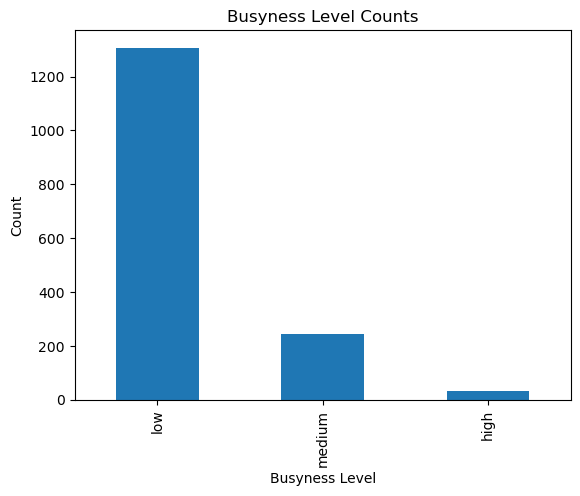

In [50]:
# Create a new figure and axes
fig, ax = plt.subplots()

# Create Bar Chart
busyness_level_counts.plot(kind='bar', ax=ax)

# Set title and tags
ax.set_title('Busyness Level Counts')
ax.set_xlabel('Busyness Level')
ax.set_ylabel('Count')

# plot the graph
plt.show()

### set threshold as 0-1000 as low, 1000-2000 as medium and above 2000 as high

- since there's a significant drop in the frequency of values above 2000, i set that as the threshold for "high” busyness. So 0-1000 as low, 1000-2000 as medium.

In [51]:
activity_df_noHoliday['busyness_level'] = pd.qcut(activity_df_noHoliday['busyness'], 3, labels=['low', 'medium', 'high'])

In [52]:
bins = [0, 1000, 2000, np.inf]
names = ['low', 'medium', 'high']
activity_df_noHoliday['busyness_level'] = pd.cut(activity_df_noHoliday['busyness'], bins, labels=names)

In [53]:
# Calculate the number of each level
busyness_levels = activity_df_noHoliday['busyness_level'].value_counts()

print(busyness_levels)

busyness_level
high      1072
low        324
medium     188
Name: count, dtype: int64


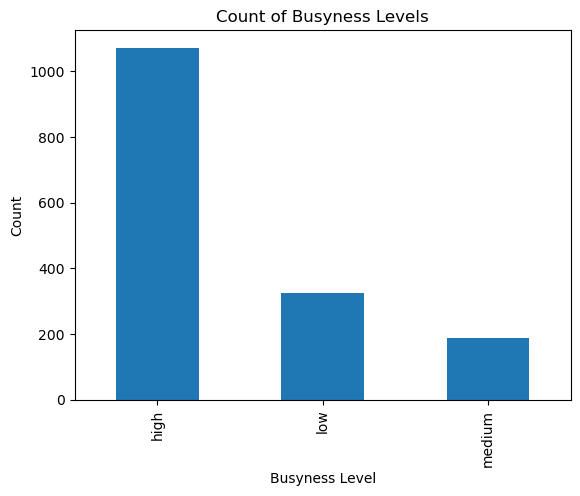

In [54]:
# Create a bar chart
busyness_levels.plot(kind='bar')

# Adding titles and labels to charts
plt.title('Count of Busyness Levels')
plt.xlabel('Busyness Level')
plt.ylabel('Count')

# plot the graph
plt.show()

### use pandas' qcut function to bin based on quantiles, 
### a uniformly distributed binning (each bin has roughly an equal number of observations),

- use percentiles to determine the thresholds for the levels like 33.3% as low, 66.6% as medium, above the 66% is "high”. 

In [55]:
# Splitting boxes with qcut
activity_df_noHoliday['busyness_level'] = pd.qcut(activity_df_noHoliday['busyness'], q=[0, .33, .67, 1], labels=["low", "medium", "high"])

# Calculate the number of each level
busyness_levels = activity_df_noHoliday['busyness_level'].value_counts()

print(busyness_levels)

busyness_level
medium    538
low       523
high      523
Name: count, dtype: int64


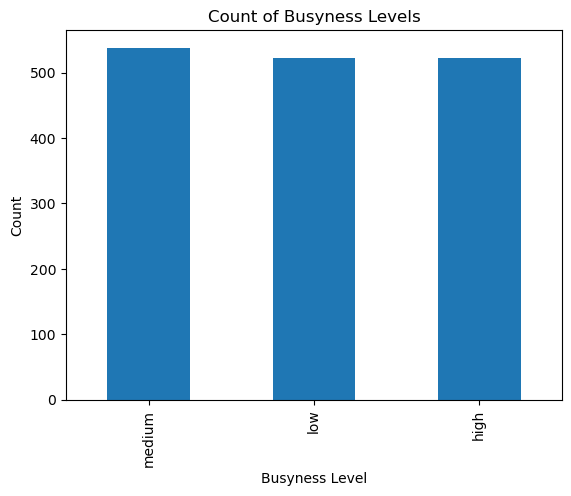

In [56]:
# Create a bar chart
busyness_levels.plot(kind='bar')

# Adding titles and labels to charts
plt.title('Count of Busyness Levels')
plt.xlabel('Busyness Level')
plt.ylabel('Count')

# plot the graph
plt.show()

### incorporate the mean and standard deviation into defining the busyness levels, 
### use standard scores, or z-scores.

### Before removing outliers
#### method 1

- This approach is based on the standard normal distribution where about 68% of the values fall within one standard deviation of the mean (which will be classified as 'medium'), 14% continue to fall within the second standard deviation (which will be classified as 'low' or 'high'), and the remaining 2% will be extremely high or extremely low busyness.

In [57]:
mean = activity_df_noHoliday['busyness'].mean()
std = activity_df_noHoliday['busyness'].std()
activity_df_noHoliday['z_score'] = (activity_df_noHoliday['busyness'] - mean) / std
activity_df_noHoliday['busyness_level'] = pd.cut(activity_df_noHoliday['z_score'], bins=[-np.inf, -1, 1, np.inf], labels=['low', 'medium', 'high'])
activity_df_noHoliday

,LocationID,time,pickup_count,dropoff_count,busyness,busyness_level,z_score
0,4,00:00:00,1559.5,3793.5,2676.50,medium,-0.628698
1,4,01:00:00,1685.5,2798.0,2241.75,medium,-0.668722
2,4,02:00:00,1479.0,1993.5,1736.25,medium,-0.715260
3,4,03:00:00,815.5,1188.5,1002.00,medium,-0.782857
4,4,04:00:00,231.5,692.0,461.75,medium,-0.832594
...,...,...,...,...,...,...,...
1579,263,19:00:00,21913.5,27655.5,24784.50,high,1.406631
1580,263,20:00:00,18798.5,24951.0,21874.75,high,1.138751
1581,263,21:00:00,17776.0,24033.5,20904.75,high,1.049450
1582,263,22:00:00,16570.0,23766.0,20168.00,medium,0.981622


In [58]:
# Calculate the count of each level
level_counts = activity_df_noHoliday['busyness_level'].value_counts()
level_counts

busyness_level
medium    1322
high       262
low          0
Name: count, dtype: int64

- since the data is not normally distributed, these thresholds may not produce balanced categories.

### Before removing outliers
#### method 2

- In our case, where we have a lot of data falling within one standard deviation from the mean (in the "medium" category), we might try adjusting your Z-score thresholds to create more balanced categories. 

- We could consider data within 0.5 standard deviations from the mean as "medium", data more than 0.5 standard deviations above the mean as "high", and data more than 0.5 standard deviations below the mean as "low".

In [59]:
mean_busyness_noHoliday = activity_df_noHoliday['busyness'].mean()
std_busyness_noHoliday = activity_df_noHoliday['busyness'].std()

conditions = [
    (activity_df_noHoliday['busyness'] < mean_busyness_noHoliday - 0.5*std_busyness_noHoliday),
    (activity_df_noHoliday['busyness'] > mean_busyness_noHoliday + 0.5*std_busyness_noHoliday),
    (activity_df_noHoliday['busyness'] >= mean_busyness_noHoliday - 0.5*std_busyness_noHoliday) & 
    (activity_df_noHoliday['busyness'] <= mean_busyness_noHoliday + 0.5*std_busyness_noHoliday)
]

# create a list of the values we want to assign for each condition
values = ['low', 'high', 'medium']

# create a new column and use np.select to assign values to it using our lists as arguments
activity_df_noHoliday['busyness_level'] = np.select(conditions, values)
activity_df_noHoliday

,LocationID,time,pickup_count,dropoff_count,busyness,busyness_level,z_score
0,4,00:00:00,1559.5,3793.5,2676.50,low,-0.628698
1,4,01:00:00,1685.5,2798.0,2241.75,low,-0.668722
2,4,02:00:00,1479.0,1993.5,1736.25,low,-0.715260
3,4,03:00:00,815.5,1188.5,1002.00,low,-0.782857
4,4,04:00:00,231.5,692.0,461.75,low,-0.832594
...,...,...,...,...,...,...,...
1579,263,19:00:00,21913.5,27655.5,24784.50,high,1.406631
1580,263,20:00:00,18798.5,24951.0,21874.75,high,1.138751
1581,263,21:00:00,17776.0,24033.5,20904.75,high,1.049450
1582,263,22:00:00,16570.0,23766.0,20168.00,high,0.981622


In [60]:
# Calculate the count of each level
level_counts = activity_df_noHoliday['busyness_level'].value_counts()
level_counts

busyness_level
low       724
medium    479
high      381
Name: count, dtype: int64

### After removing outliers

In [61]:
# Remove outliers that are more than 3 standard deviations from the mean
activity_df_noHoliday_rmoutliers = activity_df_noHoliday[np.abs(activity_df_noHoliday["busyness"]-activity_df_noHoliday["busyness"].mean()) <= (3*activity_df_noHoliday["busyness"].std())]
activity_df_noHoliday_rmoutliers

,LocationID,time,pickup_count,dropoff_count,busyness,busyness_level,z_score
0,4,00:00:00,1559.5,3793.5,2676.50,low,-0.628698
1,4,01:00:00,1685.5,2798.0,2241.75,low,-0.668722
2,4,02:00:00,1479.0,1993.5,1736.25,low,-0.715260
3,4,03:00:00,815.5,1188.5,1002.00,low,-0.782857
4,4,04:00:00,231.5,692.0,461.75,low,-0.832594
...,...,...,...,...,...,...,...
1579,263,19:00:00,21913.5,27655.5,24784.50,high,1.406631
1580,263,20:00:00,18798.5,24951.0,21874.75,high,1.138751
1581,263,21:00:00,17776.0,24033.5,20904.75,high,1.049450
1582,263,22:00:00,16570.0,23766.0,20168.00,high,0.981622


In [62]:
mean_busyness_noHoliday = activity_df_noHoliday_rmoutliers['busyness'].mean()
std_busyness_noHoliday = activity_df_noHoliday_rmoutliers['busyness'].std()
print(mean_busyness_noHoliday)
print(std_busyness_noHoliday)

8776.104273778921
9461.415134555957


In [63]:
# consider data within 0.5 standard deviations from the mean as "medium", 
# data more than 0.5 standard deviations above the mean as "high", 
# and data more than 0.5 standard deviations below the mean as "low"
conditions = [
    (activity_df_noHoliday['busyness'] < mean_busyness_noHoliday - 0.5*std_busyness_noHoliday),
    (activity_df_noHoliday['busyness'] > mean_busyness_noHoliday + 0.5*std_busyness_noHoliday),
    (activity_df_noHoliday['busyness'] >= mean_busyness_noHoliday - 0.5*std_busyness_noHoliday) & 
    (activity_df_noHoliday['busyness'] <= mean_busyness_noHoliday + 0.5*std_busyness_noHoliday)
]

# create a list of the values we want to assign for each condition
values = ['low', 'high', 'medium']

# create a new column and use np.select to assign values to it using our lists as arguments
activity_df_noHoliday['busyness_level'] = np.select(conditions, values)
activity_df_noHoliday

,LocationID,time,pickup_count,dropoff_count,busyness,busyness_level,z_score
0,4,00:00:00,1559.5,3793.5,2676.50,low,-0.628698
1,4,01:00:00,1685.5,2798.0,2241.75,low,-0.668722
2,4,02:00:00,1479.0,1993.5,1736.25,low,-0.715260
3,4,03:00:00,815.5,1188.5,1002.00,low,-0.782857
4,4,04:00:00,231.5,692.0,461.75,low,-0.832594
...,...,...,...,...,...,...,...
1579,263,19:00:00,21913.5,27655.5,24784.50,high,1.406631
1580,263,20:00:00,18798.5,24951.0,21874.75,high,1.138751
1581,263,21:00:00,17776.0,24033.5,20904.75,high,1.049450
1582,263,22:00:00,16570.0,23766.0,20168.00,high,0.981622


In [64]:
# Calculate the count of each level
busyness_counts = activity_df_noHoliday['busyness_level'].value_counts()
busyness_counts

busyness_level
low       723
high      431
medium    430
Name: count, dtype: int64

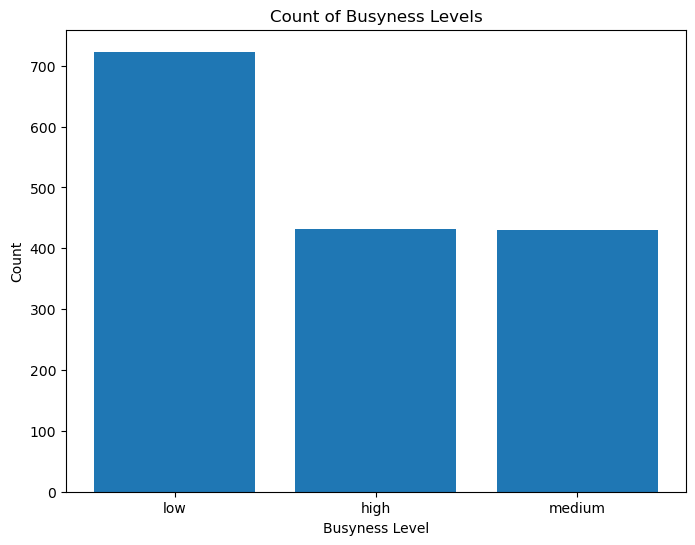

In [65]:
# Create the bar plot
plt.figure(figsize=(8, 6))
plt.bar(busyness_counts.index, busyness_counts.values)
plt.xlabel('Busyness Level')
plt.ylabel('Count')
plt.title('Count of Busyness Levels')
plt.show()

- This approach gives us more flexibility in defining the Z-score thresholds and can lead to more balanced categories, but we may need to adjust the thresholds further based on our specific data and use case.

## busyness calculation when on holiday

In [66]:
# Rename the columns of the pickup_activity_noHoliday and dropoff_activity_noHoliday DataFrame
pickup_activity_Holiday.rename(columns={'pickup_time': 'time', 'PULocationID': 'LocationID'}, inplace=True)
dropoff_activity_Holiday.rename(columns={'dropoff_time': 'time', 'DOLocationID': 'LocationID'}, inplace=True)

In [67]:
# Create two new DataFrames, one for rows with 'LocationID' in the 'manhattan_ids' list 
# and one for rows with 'LocationID' not in the 'manhattan_ids' list
pickup_activity_Holiday_in_manhattan = pickup_activity_Holiday[pickup_activity_Holiday['LocationID'].isin(manhattan_ids)]
pickup_activity_Holiday_outside_manhattan = pickup_activity_Holiday[~pickup_activity_Holiday['LocationID'].isin(manhattan_ids)]
print(pickup_activity_Holiday_in_manhattan)
print(pickup_activity_Holiday_outside_manhattan)

      LocationID      time  holiday  pickup_count
4              4  00:00:00     True            49
5              4  01:00:00     True            31
6              4  02:00:00     True            31
7              4  03:00:00     True             6
8              4  04:00:00     True             3
...          ...       ...      ...           ...
2620         263  19:00:00     True           861
2621         263  20:00:00     True           705
2622         263  21:00:00     True           707
2623         263  22:00:00     True           686
2624         263  23:00:00     True           479

[1489 rows x 4 columns]
      LocationID      time  holiday  pickup_count
0              1  19:00:00     True             2
1              1  20:00:00     True             1
2              3  14:00:00     True             1
3              3  19:00:00     True             1
27             5  09:00:00     True             1
...          ...       ...      ...           ...
2653         265  14:00:0

In [68]:
# Got rows for dropoff in manhattan and outside manhattan on holiday
dropoff_activity_Holiday_in_manhattan = dropoff_activity_Holiday[dropoff_activity_Holiday['LocationID'].isin(manhattan_ids)]
dropoff_activity_Holiday_outside_manhattan = dropoff_activity_Holiday[~dropoff_activity_Holiday['LocationID'].isin(manhattan_ids)]
print(dropoff_activity_Holiday_in_manhattan)
print(dropoff_activity_Holiday_outside_manhattan)

      LocationID      time  holiday  dropoff_count
34             4  00:00:00     True            173
35             4  01:00:00     True            105
36             4  02:00:00     True             65
37             4  03:00:00     True             51
38             4  04:00:00     True             27
...          ...       ...      ...            ...
4488         263  19:00:00     True           1119
4489         263  20:00:00     True           1065
4490         263  21:00:00     True            985
4491         263  22:00:00     True           1015
4492         263  23:00:00     True            740

[1557 rows x 4 columns]
      LocationID      time  holiday  dropoff_count
0              1  00:00:00     True              2
1              1  01:00:00     True              3
2              1  02:00:00     True              4
3              1  03:00:00     True             13
4              1  04:00:00     True             51
...          ...       ...      ...            ...
4536  

In [69]:
pickup_activity_Holiday_outside_manhattan = pickup_activity_Holiday[~pickup_activity_Holiday['LocationID'].isin(manhattan_ids)].copy()
pickup_activity_Holiday_outside_manhattan['pickup_count'] = 0

In [70]:
dropoff_activity_Holiday_outside_manhattan = dropoff_activity_Holiday[~dropoff_activity_Holiday['LocationID'].isin(manhattan_ids)].copy()
dropoff_activity_Holiday_outside_manhattan['dropoff_count'] = 0

In [71]:
# Combine these 4 DataFrames
activity_df_in_manhattan = pd.concat([pickup_activity_Holiday_in_manhattan, dropoff_activity_Holiday_in_manhattan], ignore_index=True)
activity_df_outside_manhattan = pd.concat([pickup_activity_Holiday_outside_manhattan, dropoff_activity_Holiday_outside_manhattan], ignore_index=True)
activity_df_Holiday = pd.concat([activity_df_in_manhattan, activity_df_outside_manhattan], ignore_index=True)

activity_df_Holiday['pickup_count'].fillna(0, inplace=True)
activity_df_Holiday['dropoff_count'].fillna(0, inplace=True)
activity_df_Holiday

,LocationID,time,holiday,pickup_count,dropoff_count
0,4,00:00:00,True,49.0,0.0
1,4,01:00:00,True,31.0,0.0
2,4,02:00:00,True,31.0,0.0
3,4,03:00:00,True,6.0,0.0
4,4,04:00:00,True,3.0,0.0
...,...,...,...,...,...
7194,265,19:00:00,True,0.0,0.0
7195,265,20:00:00,True,0.0,0.0
7196,265,21:00:00,True,0.0,0.0
7197,265,22:00:00,True,0.0,0.0


In [72]:
# print the rows where 'pickup_count' and 'dropoff_count' are both 0
zero_activity_rows_holiday = activity_df_Holiday[(activity_df_Holiday['pickup_count'] == 0) & (activity_df_Holiday['dropoff_count'] == 0)]

print(zero_activity_rows_holiday)

      LocationID      time  holiday  pickup_count  dropoff_count
3046           1  19:00:00     True           0.0            0.0
3047           1  20:00:00     True           0.0            0.0
3048           3  14:00:00     True           0.0            0.0
3049           3  19:00:00     True           0.0            0.0
3050           5  09:00:00     True           0.0            0.0
...          ...       ...      ...           ...            ...
7194         265  19:00:00     True           0.0            0.0
7195         265  20:00:00     True           0.0            0.0
7196         265  21:00:00     True           0.0            0.0
7197         265  22:00:00     True           0.0            0.0
7198         265  23:00:00     True           0.0            0.0

[4153 rows x 5 columns]


In [73]:
# delete the rows where 'pickup_count' and 'dropoff_count' are both 0
activity_df_Holiday = activity_df_Holiday.drop(zero_activity_rows_holiday.index)
activity_df_Holiday

,LocationID,time,holiday,pickup_count,dropoff_count
0,4,00:00:00,True,49.0,0.0
1,4,01:00:00,True,31.0,0.0
2,4,02:00:00,True,31.0,0.0
3,4,03:00:00,True,6.0,0.0
4,4,04:00:00,True,3.0,0.0
...,...,...,...,...,...
3041,263,19:00:00,True,0.0,1119.0
3042,263,20:00:00,True,0.0,1065.0
3043,263,21:00:00,True,0.0,985.0
3044,263,22:00:00,True,0.0,1015.0


In [74]:
# Use the 'groupby' method to group by 'LocationID' and 'time', then calculate the "busyness" of each group
activity_df_Holiday['busyness'] = (activity_df_Holiday['pickup_count'] + activity_df_Holiday['dropoff_count']) / 2
activity_df_Holiday = activity_df_Holiday.groupby(['LocationID', 'time'], as_index=False).mean()
activity_df_Holiday = activity_df_Holiday.groupby(['LocationID', 'time'], as_index=False).agg({'pickup_count':'mean', 'dropoff_count':'mean', 'busyness':'mean'})
activity_df_Holiday

,LocationID,time,pickup_count,dropoff_count,busyness
0,4,00:00:00,24.5,86.5,55.50
1,4,01:00:00,15.5,52.5,34.00
2,4,02:00:00,15.5,32.5,24.00
3,4,03:00:00,3.0,25.5,14.25
4,4,04:00:00,1.5,13.5,7.50
...,...,...,...,...,...
1559,263,19:00:00,430.5,559.5,495.00
1560,263,20:00:00,352.5,532.5,442.50
1561,263,21:00:00,353.5,492.5,423.00
1562,263,22:00:00,343.0,507.5,425.25


In [75]:
# Got maximum and minimum value for busyness when on holiday
max_busyness_Holiday = activity_df_Holiday['busyness'].max()
min_busyness_Holiday = activity_df_Holiday['busyness'].min()

print("Maximum busyness: ", max_busyness_Holiday)
print("Minimum busyness: ", min_busyness_Holiday)

Maximum busyness:  1179.5
Minimum busyness:  0.5


In [76]:
# Remove outliers that are more than 3 standard deviations from the mean
activity_df_Holiday_rmoutliers = activity_df_Holiday[np.abs(activity_df_Holiday["busyness"]-activity_df_Holiday["busyness"].mean()) <= (3*activity_df_Holiday["busyness"].std())]
activity_df_Holiday_rmoutliers

,LocationID,time,pickup_count,dropoff_count,busyness
0,4,00:00:00,24.5,86.5,55.50
1,4,01:00:00,15.5,52.5,34.00
2,4,02:00:00,15.5,32.5,24.00
3,4,03:00:00,3.0,25.5,14.25
4,4,04:00:00,1.5,13.5,7.50
...,...,...,...,...,...
1559,263,19:00:00,430.5,559.5,495.00
1560,263,20:00:00,352.5,532.5,442.50
1561,263,21:00:00,353.5,492.5,423.00
1562,263,22:00:00,343.0,507.5,425.25


In [77]:
mean_busyness_Holiday = activity_df_Holiday_rmoutliers['busyness'].mean()
std_busyness_Holiday = activity_df_Holiday_rmoutliers['busyness'].std()
print(mean_busyness_Holiday)
print(std_busyness_Holiday)

187.34322308690014
202.7271187098636


In [78]:
# consider data within 0.5 standard deviations from the mean as "medium", 
# data more than 0.5 standard deviations above the mean as "high", 
# and data more than 0.5 standard deviations below the mean as "low"
conditions = [
    (activity_df_Holiday['busyness'] < mean_busyness_Holiday - 0.5*std_busyness_Holiday),
    (activity_df_Holiday['busyness'] > mean_busyness_Holiday + 0.5*std_busyness_Holiday),
    (activity_df_Holiday['busyness'] >= mean_busyness_Holiday - 0.5*std_busyness_Holiday) & 
    (activity_df_Holiday['busyness'] <= mean_busyness_Holiday + 0.5*std_busyness_Holiday)
]

# create a list of the values we want to assign for each condition
values = ['low', 'high', 'medium']

# create a new column and use np.select to assign values to it using our lists as arguments
activity_df_Holiday['busyness_level'] = np.select(conditions, values)
activity_df_Holiday

,LocationID,time,pickup_count,dropoff_count,busyness,busyness_level
0,4,00:00:00,24.5,86.5,55.50,low
1,4,01:00:00,15.5,52.5,34.00,low
2,4,02:00:00,15.5,32.5,24.00,low
3,4,03:00:00,3.0,25.5,14.25,low
4,4,04:00:00,1.5,13.5,7.50,low
...,...,...,...,...,...,...
1559,263,19:00:00,430.5,559.5,495.00,high
1560,263,20:00:00,352.5,532.5,442.50,high
1561,263,21:00:00,353.5,492.5,423.00,high
1562,263,22:00:00,343.0,507.5,425.25,high


In [79]:
# Calculate the count of each level
busyness_counts = activity_df_Holiday['busyness_level'].value_counts()
busyness_counts

busyness_level
low       714
medium    438
high      412
Name: count, dtype: int64

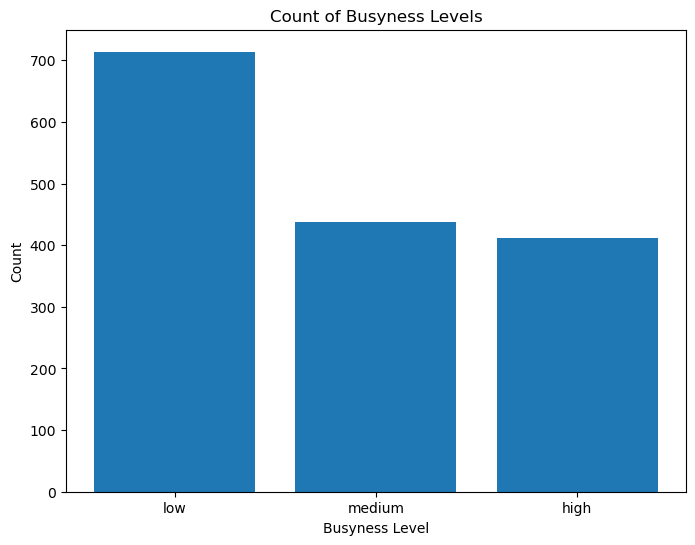

In [80]:
# Create the bar plot
plt.figure(figsize=(8, 6))
plt.bar(busyness_counts.index, busyness_counts.values)
plt.xlabel('Busyness Level')
plt.ylabel('Count')
plt.title('Count of Busyness Levels')
plt.show()

In [81]:
# Load the weather parquet file into a pandas DataFrame
df_weather = pd.read_parquet('weather_filtered.parquet')

In [82]:
df_weather.shape

(8736, 4)

In [83]:
df_weather

,temp,weather,weather_description,weather_time
0,10.6,"{'code': 804, 'description': 'Overcast clouds'...",Cloudy,05:00:00
1,10.6,"{'code': 804, 'description': 'Overcast clouds'...",Cloudy,06:00:00
2,10.6,"{'code': 804, 'description': 'Overcast clouds'...",Cloudy,07:00:00
3,10.6,"{'code': 804, 'description': 'Overcast clouds'...",Cloudy,08:00:00
4,10.0,"{'code': 804, 'description': 'Overcast clouds'...",Cloudy,09:00:00
...,...,...,...,...
8731,13.3,"{'code': 800, 'description': 'Clear Sky', 'ico...",Clear Sky,00:00:00
8732,10.0,"{'code': 800, 'description': 'Clear Sky', 'ico...",Clear Sky,01:00:00
8733,10.0,"{'code': 800, 'description': 'Clear Sky', 'ico...",Clear Sky,02:00:00
8734,11.7,"{'code': 800, 'description': 'Clear Sky', 'ico...",Clear Sky,03:00:00


### Combine the activity_df_Holiday together with weather dataframe

In [84]:
combined_Holiday_df = pd.merge(activity_df_Holiday, df_weather, left_on='time', right_on='weather_time', how='inner')
combined_Holiday_df

,LocationID,time,pickup_count,dropoff_count,busyness,busyness_level,temp,weather,weather_description,weather_time
0,4,00:00:00,24.5,86.5,55.50,low,12.2,"{'code': 500, 'description': 'Light rain', 'ic...",rain,00:00:00
1,4,00:00:00,24.5,86.5,55.50,low,7.8,"{'code': 804, 'description': 'Overcast clouds'...",Cloudy,00:00:00
2,4,00:00:00,24.5,86.5,55.50,low,-3.3,"{'code': 800, 'description': 'Clear Sky', 'ico...",Clear Sky,00:00:00
3,4,00:00:00,24.5,86.5,55.50,low,0.6,"{'code': 800, 'description': 'Clear Sky', 'ico...",Clear Sky,00:00:00
4,4,00:00:00,24.5,86.5,55.50,low,7.8,"{'code': 802, 'description': 'Scattered clouds...",Cloudy,00:00:00
...,...,...,...,...,...,...,...,...,...,...
569291,263,23:00:00,239.5,370.0,304.75,high,-2.2,"{'code': 804, 'description': 'Overcast clouds'...",Cloudy,23:00:00
569292,263,23:00:00,239.5,370.0,304.75,high,1.1,"{'code': 804, 'description': 'Overcast clouds'...",Cloudy,23:00:00
569293,263,23:00:00,239.5,370.0,304.75,high,7.2,"{'code': 800, 'description': 'Clear Sky', 'ico...",Clear Sky,23:00:00
569294,263,23:00:00,239.5,370.0,304.75,high,9.4,"{'code': 800, 'description': 'Clear Sky', 'ico...",Clear Sky,23:00:00


In [85]:
combined_Holiday_df = combined_Holiday_df.drop('weather', axis=1)
combined_Holiday_df

,LocationID,time,pickup_count,dropoff_count,busyness,busyness_level,temp,weather_description,weather_time
0,4,00:00:00,24.5,86.5,55.50,low,12.2,rain,00:00:00
1,4,00:00:00,24.5,86.5,55.50,low,7.8,Cloudy,00:00:00
2,4,00:00:00,24.5,86.5,55.50,low,-3.3,Clear Sky,00:00:00
3,4,00:00:00,24.5,86.5,55.50,low,0.6,Clear Sky,00:00:00
4,4,00:00:00,24.5,86.5,55.50,low,7.8,Cloudy,00:00:00
...,...,...,...,...,...,...,...,...,...
569291,263,23:00:00,239.5,370.0,304.75,high,-2.2,Cloudy,23:00:00
569292,263,23:00:00,239.5,370.0,304.75,high,1.1,Cloudy,23:00:00
569293,263,23:00:00,239.5,370.0,304.75,high,7.2,Clear Sky,23:00:00
569294,263,23:00:00,239.5,370.0,304.75,high,9.4,Clear Sky,23:00:00


### Combine the activity_df_noHoliday together with weather dataframe

In [86]:
combined_noHoliday_df = pd.merge(activity_df_noHoliday, df_weather, left_on='time', right_on='weather_time', how='inner')
combined_noHoliday_df

,LocationID,time,pickup_count,dropoff_count,busyness,busyness_level,z_score,temp,weather,weather_description,weather_time
0,4,00:00:00,1559.5,3793.5,2676.50,low,-0.628698,12.2,"{'code': 500, 'description': 'Light rain', 'ic...",rain,00:00:00
1,4,00:00:00,1559.5,3793.5,2676.50,low,-0.628698,7.8,"{'code': 804, 'description': 'Overcast clouds'...",Cloudy,00:00:00
2,4,00:00:00,1559.5,3793.5,2676.50,low,-0.628698,-3.3,"{'code': 800, 'description': 'Clear Sky', 'ico...",Clear Sky,00:00:00
3,4,00:00:00,1559.5,3793.5,2676.50,low,-0.628698,0.6,"{'code': 800, 'description': 'Clear Sky', 'ico...",Clear Sky,00:00:00
4,4,00:00:00,1559.5,3793.5,2676.50,low,-0.628698,7.8,"{'code': 802, 'description': 'Scattered clouds...",Cloudy,00:00:00
...,...,...,...,...,...,...,...,...,...,...,...
576571,263,23:00:00,12258.5,19321.0,15789.75,high,0.578547,-2.2,"{'code': 804, 'description': 'Overcast clouds'...",Cloudy,23:00:00
576572,263,23:00:00,12258.5,19321.0,15789.75,high,0.578547,1.1,"{'code': 804, 'description': 'Overcast clouds'...",Cloudy,23:00:00
576573,263,23:00:00,12258.5,19321.0,15789.75,high,0.578547,7.2,"{'code': 800, 'description': 'Clear Sky', 'ico...",Clear Sky,23:00:00
576574,263,23:00:00,12258.5,19321.0,15789.75,high,0.578547,9.4,"{'code': 800, 'description': 'Clear Sky', 'ico...",Clear Sky,23:00:00


In [87]:
combined_noHoliday_df = combined_noHoliday_df.drop(['weather','z_score'], axis=1)
combined_noHoliday_df

,LocationID,time,pickup_count,dropoff_count,busyness,busyness_level,temp,weather_description,weather_time
0,4,00:00:00,1559.5,3793.5,2676.50,low,12.2,rain,00:00:00
1,4,00:00:00,1559.5,3793.5,2676.50,low,7.8,Cloudy,00:00:00
2,4,00:00:00,1559.5,3793.5,2676.50,low,-3.3,Clear Sky,00:00:00
3,4,00:00:00,1559.5,3793.5,2676.50,low,0.6,Clear Sky,00:00:00
4,4,00:00:00,1559.5,3793.5,2676.50,low,7.8,Cloudy,00:00:00
...,...,...,...,...,...,...,...,...,...
576571,263,23:00:00,12258.5,19321.0,15789.75,high,-2.2,Cloudy,23:00:00
576572,263,23:00:00,12258.5,19321.0,15789.75,high,1.1,Cloudy,23:00:00
576573,263,23:00:00,12258.5,19321.0,15789.75,high,7.2,Clear Sky,23:00:00
576574,263,23:00:00,12258.5,19321.0,15789.75,high,9.4,Clear Sky,23:00:00
